In [7]:
import torch
import torch.nn as nn
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [42]:
path='D:/codes/M.Tech_proj/SPP_assignment_data/SPP_assignment_data/clean_speech/clean_speech/test'
a=[]
i=[]
u=[]
for each in os.listdir(path):
    wav,sr=librosa.load(path+'/'+each)
    f0,_,_=librosa.pyin(wav,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'),sr=sr)
    f0[np.isnan(f0)]=0
    # lpc=librosa.lpc(wav,order=16)
    # mfcc=librosa.feature.mfcc(wav)
    # spect=librosa.stft(wav)
    # spect=librosa.amplitude_to_db(np.abs(spect),ref=np.max)
    if each.split('_')[1]=='AA':
        a.append([f0,0])
    if each.split('_')[1]=='II':
        i.append([f0,1])
    if each.split('_')[1]=='UU':
        u.append([f0,2])

In [43]:
dataset=a+i+u
np.random.shuffle(dataset)

In [3]:
import pickle
fp=open('test_clean','wb')
pickle.dump(dataset,fp)

In [4]:
class lstm_model(nn.Module):
    def __init__(self,input,hidden,out):
        super(lstm_model,self).__init__()
        self.l1=nn.LSTM(input,hidden,dtype=torch.double)
        self.l2=nn.LSTM(hidden,hidden,dtype=torch.double)
        self.l3=nn.Linear(hidden,out,dtype=torch.double)
        self.l4=nn.Softmax(dim=2)
    def forward(self,data):
        h0,_=self.l1(data)
        h0,_=self.l2(h0)
        e=self.l3(h0)
        return self.l4(e)

In [1]:
import pickle
fp=open('D:/codes/M.Tech_proj/train_clean_mfcc','rb')
dataset=pickle.load(fp)
fp.close()

In [13]:
len(dataset)

584

In [5]:
dataset[0][0].shape

(20, 87)

In [11]:
LF=nn.CrossEntropyLoss()
model=lstm_model(20,6,3)
optim=torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
model.to(device='cuda:0')
LF.to(device='cuda:0')
prev_l=0
for epoch in range(100):
    l=0
    np.random.shuffle(dataset)
    optim.zero_grad()
    i=0
    for each in dataset:
        i+=1
        pred=model(torch.from_numpy(each[0].reshape(each[0].shape[1],1,each[0].shape[0])).to(torch.double).to(device='cuda:0'))
        pred.squeeze(dim=1)
        label=torch.tensor([0,0,0])
        label[each[1]]=1
        label=label.repeat(each[0].shape[1],1)
        label.to(pred.dtype)
        label=label.to(device='cuda:0')
        label=label.double()
        pred=pred.double()
        loss=LF(pred.squeeze(),label)
        # print(loss)
        loss.backward()
        with torch.no_grad():
            l+=loss.item()
        if i%10==0:
            optim.step()
            optim.zero_grad()
    print("loss after {} epoch is {}".format(epoch,l))

loss after 0 epoch is 642.1609072100006
loss after 1 epoch is 641.7084505796892
loss after 2 epoch is 641.4311115193988
loss after 3 epoch is 640.9649289148044
loss after 4 epoch is 641.1308486485443
loss after 5 epoch is 640.7643300841419
loss after 6 epoch is 640.8487049206835
loss after 7 epoch is 640.5557343658287
loss after 8 epoch is 640.5133995732969
loss after 9 epoch is 640.4165146864816
loss after 10 epoch is 640.5108552278233
loss after 11 epoch is 640.2643091510052
loss after 12 epoch is 640.1307053003084
loss after 13 epoch is 640.228894996288
loss after 14 epoch is 639.8572751881555
loss after 15 epoch is 639.7491907647907
loss after 16 epoch is 640.0449929995253
loss after 17 epoch is 639.9056670035543
loss after 18 epoch is 639.6249992722869
loss after 19 epoch is 639.4413774544751
loss after 20 epoch is 639.3121570158794
loss after 21 epoch is 639.3480008866891
loss after 22 epoch is 638.9809415044905
loss after 23 epoch is 638.6854220051753
loss after 24 epoch is 638.

In [8]:
pred.shape

torch.Size([87, 1, 3])

In [21]:
model.eval()

lstm_model(
  (l1): LSTM(1, 6)
  (l2): LSTM(6, 6)
  (l3): Linear(in_features=6, out_features=3, bias=True)
  (l4): Softmax(dim=2)
)

In [22]:
model.to(device='cpu')

lstm_model(
  (l1): LSTM(1, 6)
  (l2): LSTM(6, 6)
  (l3): Linear(in_features=6, out_features=3, bias=True)
  (l4): Softmax(dim=2)
)

In [31]:
fp=open('train_clean','rb')
dataset=pickle.load(fp)
fp.close()
count=0
for data in dataset:
    y=model(torch.tensor(data[0].reshape(data[0].shape[0],1,1)).to(torch.double))
    if (y.sum(dim=0)).argmax(dim=1)[0]==data[1]:
        count+=1

In [32]:
len(dataset)

584

In [33]:
count

242

In [34]:
fp=open('train_clean_spec','rb')
dataset=pickle.load(fp)
fp.close()

In [67]:
dataset[0][0].shape

(1025, 87)

In [141]:
class lstm_model(nn.Module):
    def __init__(self,input,hidden,out):
        super(lstm_model,self).__init__()
        self.l1=nn.LSTM(input,hidden,dtype=torch.double)
        # self.l2=nn.LSTM(hidden,hidden,dtype=torch.double)
        # self.l3=nn.LSTM(hidden,hidden,dtype=torch.double)
        self.l4=nn.LSTM(hidden,hidden,dtype=torch.double)
        self.l5=nn.Linear(hidden,out,dtype=torch.double)
        self.l6=nn.Softmax(dim=1)
    def forward(self,data):
        # print(data)
        h0,_=self.l1(data)
        # h0,_=self.l2(h0)
        # h0,_=self.l3(h0)
        h0,_=self.l4(h0)
        e=self.l5(h0[-1])
        return self.l6(e)

In [146]:
LF=nn.CrossEntropyLoss()
model=lstm_model(1025,10,3)
optim=torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
model.to(device='cuda:0')
LF.to(device='cuda:0')
fp=open('logging.txt','w')
for epoch in range(100):
    l=0
    np.random.shuffle(dataset)
    model.zero_grad()
    i=0
    for each in dataset:
        i+=1
        pred=model(torch.from_numpy(each[0].T.reshape(each[0].shape[1],1,each[0].shape[0])).to(torch.double).to(device='cuda:0'))
        label=torch.tensor([0,0,0])
        label[each[1]]=1
        # label=label.repeat(each[0].shape[1],1)
        label.to(pred.dtype)
        label=label.to(device='cuda:0')
        label=label.double()
        pred=pred.double()
        loss=0.1*LF(pred.squeeze(dim=0),label)
        # print(loss)
        loss.backward()
        with torch.no_grad():
            l+=loss.item()
        if i%10==0:
            # print(model.l5.weight.grad,file=fp)
            print("weights_grad_before",model.l5.weight.grad,file=fp)
            print("bias_grad_before",model.l5.bias.grad,file=fp)
            # print("weights_before",model[0].weight)
            optim.step()
            # print("weights_after",model.l5.weight,file=fp)
            # print("weights_after",model[0].weight)
            model.zero_grad()
    print("loss after {} epoch is {}".format(epoch,l))
fp.close()

loss after 0 epoch is 64.11544234332939
loss after 1 epoch is 64.03767734911165
loss after 2 epoch is 64.02687677850126
loss after 3 epoch is 63.98137041914235
loss after 4 epoch is 63.94335064767189
loss after 5 epoch is 63.92348765217487
loss after 6 epoch is 63.92843915107409
loss after 7 epoch is 63.845236507028886
loss after 8 epoch is 63.82038182465679
loss after 9 epoch is 63.8122842094625
loss after 10 epoch is 63.78682670622534
loss after 11 epoch is 63.80228025552483
loss after 12 epoch is 63.70431878977392
loss after 13 epoch is 63.65675141834722
loss after 14 epoch is 63.66862787292318
loss after 15 epoch is 63.65067431572236
loss after 16 epoch is 63.59711145545504
loss after 17 epoch is 63.469723696752624
loss after 18 epoch is 63.65058706891126
loss after 19 epoch is 63.83764865653097
loss after 20 epoch is 63.84214306913482
loss after 21 epoch is 63.69637330854025
loss after 22 epoch is 63.22675172654128
loss after 23 epoch is 63.20750879179701
loss after 24 epoch is 63

In [148]:
model.to(device='cpu')

lstm_model(
  (l1): LSTM(1025, 10)
  (l4): LSTM(10, 10)
  (l5): Linear(in_features=10, out_features=3, bias=True)
  (l6): Softmax(dim=1)
)

In [161]:
fp=open('train_clean_spec','rb')
dataset=pickle.load(fp)
fp.close()
count=0
ys=[]
for data in dataset:
    # print(data[0])
    y=model(torch.from_numpy(each[0].T.reshape(each[0].shape[1],1,each[0].shape[0])).to(torch.double))
    ys.append(y)
    if y.argmax(dim=0)[0]==data[1]:
        count+=1

In [162]:
len(dataset)

584

In [8]:
fp=open('train_clean_spec','rb')
dataset=pickle.load(fp)
fp.close()
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [9]:
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model,self).__init__()
        self.lay1=nn.Conv2d(1,6,kernel_size=3,stride=1,padding=1)
        self.lay2=nn.ReLU()
        self.lay2=nn.MaxPool2d(3)
        self.lay3=nn.Conv2d(6,1,kernel_size=3,stride=1,padding=1)
        self.lay4=nn.ReLU()
        self.lay5=nn.MaxPool2d(3)
        self.lay6=nn.Linear(9*113,100)
        self.lay7=nn.Linear(100,3)
        self.lay8=nn.Softmax(dim=1)
    def forward(self,data):
        x=self.lay1(data)
        x=self.lay2(x)
        x=self.lay3(x)
        x=self.lay4(x)
        x=self.lay5(x)
        x=self.lay6(x.view(x.shape[0],-1))
        x=self.lay7(x)
        print(x.shape)
        x=self.lay8(x)
        return x
        

In [12]:
model=CNN_model()
LF=nn.CrossEntropyLoss()
LF.to(device='cuda:0')
model.to(device='cuda:0')
optim=torch.optim.SGD(model.parameters(),0.0001,momentum=0.9)
# prev_l=np.inf
for epoch in range(100):
    l=0
    for train_fea,train_lab in train_dataloader:
        # print(train_fea.shape)
        model.zero_grad()
        y=model(train_fea.unsqueeze(dim=1).to(device='cuda:0'))
        train_lab=train_lab.to(device='cuda:0')
        loss=LF(y,train_lab)
        loss.backward()
        optim.step()
        with torch.no_grad():
            l+=loss.item()
    if prev_l-l>0:
        prev_l=l
        torch.save(model,'CNN_model_vowel')
    prev_l=l
    print("loss after {} epoch is {}".format(l,epoch))

torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([8, 3])


NameError: name 'prev_l' is not defined

In [13]:
y

tensor([[0.3051, 0.3507, 0.3442],
        [0.3051, 0.3507, 0.3442],
        [0.3051, 0.3507, 0.3442],
        [0.3051, 0.3507, 0.3442],
        [0.3051, 0.3507, 0.3442],
        [0.3051, 0.3507, 0.3442],
        [0.3051, 0.3507, 0.3442],
        [0.3051, 0.3507, 0.3442]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [267]:
fp=open('train_clean_spect_cons','rb')
dataset=pickle.load(fp)
fp.close()
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [277]:
model=CNN_model()
model.to(device='cuda:0')
optim=torch.optim.SGD(model.parameters(),0.001,momentum=0.9)
prev_l=np.inf
for epoch in range(100):
    l=0
    for train_fea,train_lab in train_dataloader:
        # print(train_fea.shape)
        model.zero_grad()
        y=model(train_fea.unsqueeze(dim=1).to(device='cuda:0'))
        train_lab=train_lab.to(device='cuda:0')
        loss=LF(y,train_lab)
        loss.backward()
        optim.step()
        with torch.no_grad():
            l+=loss.item()
    if prev_l-l>0:
        prev_l=l
        torch.save(model,'CNN_model_consonant')
    print("loss after {} epoch is {}".format(l,epoch))


loss after 4.395607233047485 epoch is 0
loss after 4.395277261734009 epoch is 1
loss after 4.39242160320282 epoch is 2
loss after 4.39226233959198 epoch is 3
loss after 4.390631556510925 epoch is 4
loss after 4.393967866897583 epoch is 5
loss after 4.391802906990051 epoch is 6
loss after 4.393234372138977 epoch is 7
loss after 4.390318036079407 epoch is 8
loss after 4.39328670501709 epoch is 9
loss after 4.392322421073914 epoch is 10
loss after 4.3895134925842285 epoch is 11
loss after 4.390265345573425 epoch is 12
loss after 4.392548084259033 epoch is 13
loss after 4.390468955039978 epoch is 14
loss after 4.391672134399414 epoch is 15
loss after 4.39161229133606 epoch is 16
loss after 4.389627933502197 epoch is 17
loss after 4.389632344245911 epoch is 18
loss after 4.391000390052795 epoch is 19
loss after 4.390263319015503 epoch is 20
loss after 4.389466881752014 epoch is 21
loss after 4.386701345443726 epoch is 22
loss after 4.386721849441528 epoch is 23
loss after 4.391894221305847 

In [279]:
model=torch.load('D:\codes\M.Tech_proj\CNN_model_consonant')

In [280]:
model.to(device='cpu')

CNN_model(
  (lay1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (lay2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (lay3): Conv2d(6, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (lay4): ReLU()
  (lay5): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (lay6): Linear(in_features=1017, out_features=100, bias=True)
  (lay7): Linear(in_features=100, out_features=3, bias=True)
  (lay8): Softmax(dim=1)
)

In [281]:
fp=open('D:/codes/M.Tech_proj/test_clean_spect_cons','rb')
dataset=pickle.load(fp)
fp.close()

In [282]:
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [283]:
ys=[]
count=0
for fea,label in train_dataloader:
    # print(data[0])
    y=model(fea.unsqueeze(dim=1))
    for i,each in enumerate(y.argmax(dim=1)):
        if each==label[i]:
            count+=1

In [284]:
count

194

In [285]:
len(dataset)

203

In [20]:
i=0
np.random.shuffle(dataset)

1


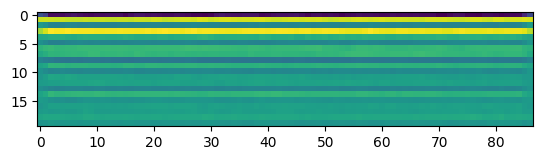

In [30]:

plt.imshow(dataset[i][0])
print(dataset[i][1])
i+=1

2


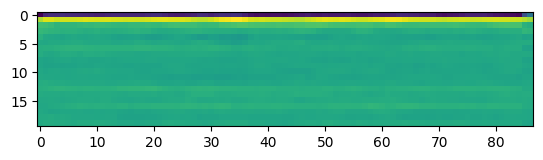

In [33]:
plt.imshow(dataset[i][0])
print(dataset[i][1])
i+=1

1


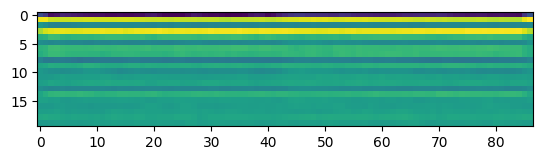

In [40]:

plt.imshow(dataset[i][0])
print(dataset[i][1])
i+=1

In [50]:
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model,self).__init__()
        self.lay1=nn.Conv2d(1,6,kernel_size=3,stride=1,padding=1)
        self.lay2=nn.ReLU()
        self.lay3=nn.Conv2d(6,1,kernel_size=3,stride=1,padding=1)
        self.lay3=nn.Conv2d(1,6,kernel_size=3,stride=1,padding=1)
        self.lay3=nn.Conv2d(6,1,kernel_size=3,stride=1,padding=1)
        self.lay4=nn.ReLU()
        self.lay6=nn.Linear(20*87,100)
        self.lay7=nn.Linear(100,3)
        self.lay8=nn.Softmax(dim=1)
    def forward(self,data):
        x=self.lay1(data)
        x=self.lay2(x)
        x=self.lay3(x)
        x=self.lay4(x)
        # print("after flatten",x.shape)
        x=self.lay6(x.view(x.shape[0],-1))
        x=self.lay7(x)
        x=self.lay8(x)
        return x
        

In [74]:
from sklearn.model_selection import train_test_split
fp=open('D:/codes/M.Tech_proj/train_clean_mfcc_cons','rb')
dataset=pickle.load(fp)
X=[0]*len(dataset)
x_train,x_test,y_train,y_test=train_test_split(dataset,X,test_size=0.2,train_size=0.8,random_state=4)
fp.close()
train_dataloader = DataLoader(x_train, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(x_test, batch_size=64, shuffle=True)

In [75]:
model=CNN_model()
model.to(device='cuda:0')
LF=nn.CrossEntropyLoss()
LF.to(device='cuda:0')
optim=torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
prev_valid=np.inf
for epoch in range(1000):
    train=0
    model.train()
    for fea,label in train_dataloader:
        model.zero_grad()
        y=model(fea.unsqueeze(dim=1).to(device='cuda:0'))
        loss=LF(y,label.to(device='cuda:0'))
        loss.backward()
        optim.step()
        with torch.no_grad():
            train+=loss
    valid=0
    model.eval()
    for fea,label in valid_dataloader:
        model.zero_grad()
        y=model(fea.unsqueeze(dim=1).to(device='cuda:0'))
        label=label.to(device='cuda:0')
        loss=LF(y,label)
        # loss = Variable(loss, requires_grad = True)
        loss.backward()
        optim.step()
        with torch.no_grad():
            valid+=loss
    if valid<prev_valid:
        prev_valid=valid
        torch.save(model,"CNN_vowel_mfcc")
    print("after {} epcoh train {} and valid {}".format(epoch,train,valid))
            

        

after 0 epcoh train 5.512387752532959 and valid 2.121208667755127
after 1 epcoh train 5.384271144866943 and valid 2.069042921066284
after 2 epcoh train 4.939950942993164 and valid 1.64150071144104
after 3 epcoh train 4.569672107696533 and valid 1.6800031661987305
after 4 epcoh train 4.265960693359375 and valid 1.9446868896484375
after 5 epcoh train 4.033776760101318 and valid 1.715843677520752
after 6 epcoh train 4.041426658630371 and valid 1.5786895751953125
after 7 epcoh train 3.775714159011841 and valid 1.4754350185394287
after 8 epcoh train 3.8787922859191895 and valid 1.270172357559204
after 9 epcoh train 3.7437686920166016 and valid 1.4959595203399658
after 10 epcoh train 3.63527250289917 and valid 1.3939297199249268
after 11 epcoh train 3.732287883758545 and valid 1.2527060508728027
after 12 epcoh train 3.560194969177246 and valid 1.490911841392517
after 13 epcoh train 3.4498817920684814 and valid 1.1881206035614014
after 14 epcoh train 3.5618643760681152 and valid 1.49224472045

In [76]:
fp=open('D:/codes/M.Tech_proj/test_clean_mfcc_cons','rb')
dataset=pickle.load(fp)
fp.close()
test_data=DataLoader(dataset,batch_size=len(dataset))

In [77]:
model.to(device='cpu')

CNN_model(
  (lay1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (lay2): ReLU()
  (lay3): Conv2d(6, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (lay4): ReLU()
  (lay6): Linear(in_features=1740, out_features=100, bias=True)
  (lay7): Linear(in_features=100, out_features=3, bias=True)
  (lay8): Softmax(dim=1)
)

In [78]:
for fea,label in test_data:
    y=model(fea.unsqueeze(dim=1))


In [79]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y.detach().numpy().argmax(axis=1),label)

In [80]:
acc

0.9880952380952381

In [ ]:
fr